<h1>Capstone Project - The Battle of the Neighborhoods</h1>
<h2>Using Foursqurea to identify best neighbourhoods in Greater Melbourne to visit </h2>
   
Due to the Covid 19 pandamic small businessses have been effected in the areas of food and entertainment. Since Victoria has now come out of the pandemic, people can now travel around the state and experiance what Melbourne has to offer while helping out the businesses in need.

From this project we expect to identify places to visit within the Greater Melbourne area and recommend them to people who wants to visit. 

<h2>Data Exploration</h2>

In [1]:
#!pip install bs4
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('Install required apps')

Install required apps


In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



In [3]:
# Local Government areas of Victoria
html_data= requests.get("https://en.wikipedia.org/wiki/Local_government_areas_of_Victoria").text
soup = BeautifulSoup(html_data, "html.parser")


In [4]:
rows=[]
table=soup.find('a',title="City of Melbourne").parent.parent.parent.parent.parent.parent
for child in table.findAll('tr'):
    row = []
    for td in child:
        if (td.string):
            val = td.string.strip('\t\r\n')
            row.append(val)
    rows.append(list(filter(None, row)))
df = pd.DataFrame(rows[1:32],columns=['Local government','Council','Region','Area','Population','Pop Density','Councilors'])
df['Latitude'] = ''
df['Longitude'] = ''
df.drop(['Councilors'],axis=1,inplace=True)
df

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude
0,City of Melbourne,Melbourne,Inner Melbourne,37,"169,961","11,897",,
1,City of Port Phillip,St Kilda,Inner Melbourne,21,"113,200","13,961",,
2,City of Stonnington,Malvern,Inner Melbourne,26,"116,207","11,576",,
3,City of Yarra,Richmond,Inner Melbourne,20,"98,521","12,758",,
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,"130,237","5,354",,
5,City of Bayside,Sandringham,Metropolitan Melbourne,37,"105,718","7,400",,
6,City of Boroondara,Camberwell,Metropolitan Melbourne,60,"181,289","7,826",,
7,City of Darebin,Preston,Metropolitan Melbourne,54,"161,609","7,751",,
8,City of Glen Eira,Caulfield North,Metropolitan Melbourne,39,"153,858","10,218",,
9,City of Hobsons Bay,Altona,Metropolitan Melbourne,64,"96,470","3,904",,


In [5]:
for i in df['Council']:
    geolocator = Nominatim(user_agent="MelbExlorer")
    location = geolocator.geocode(i+',Victoria,Australia')
    df.loc[df['Council']==i,'Latitude'] = location.latitude
    df.loc[df['Council']==i,'Longitude'] = location.longitude
df

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude
0,City of Melbourne,Melbourne,Inner Melbourne,37,"169,961","11,897",-37.8142,144.963
1,City of Port Phillip,St Kilda,Inner Melbourne,21,"113,200","13,961",-37.8638,144.982
2,City of Stonnington,Malvern,Inner Melbourne,26,"116,207","11,576",-37.8584,145.035
3,City of Yarra,Richmond,Inner Melbourne,20,"98,521","12,758",-37.8204,145.003
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,"130,237","5,354",-37.704,145.108
5,City of Bayside,Sandringham,Metropolitan Melbourne,37,"105,718","7,400",-37.9503,145.004
6,City of Boroondara,Camberwell,Metropolitan Melbourne,60,"181,289","7,826",-37.8385,145.074
7,City of Darebin,Preston,Metropolitan Melbourne,54,"161,609","7,751",-37.7419,145.008
8,City of Glen Eira,Caulfield North,Metropolitan Melbourne,39,"153,858","10,218",-37.8708,145.022
9,City of Hobsons Bay,Altona,Metropolitan Melbourne,64,"96,470","3,904",-37.8672,144.829


In [6]:
df['Population'] = df['Population'].str.replace(',', '').astype(int)
df['Pop Density'] = df['Pop Density'].str.replace(',', '').astype(int)

<h2>Exploratory Data Analysis</h2>

<BarContainer object of 31 artists>

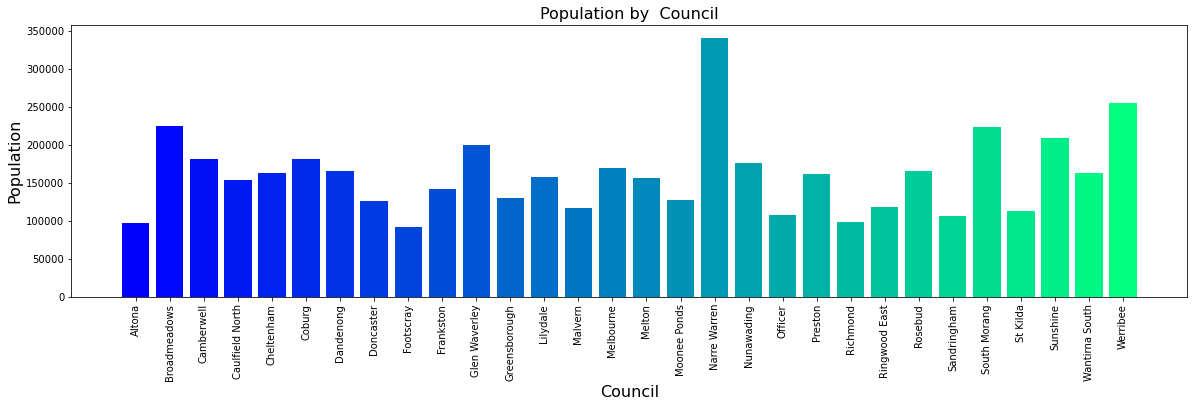

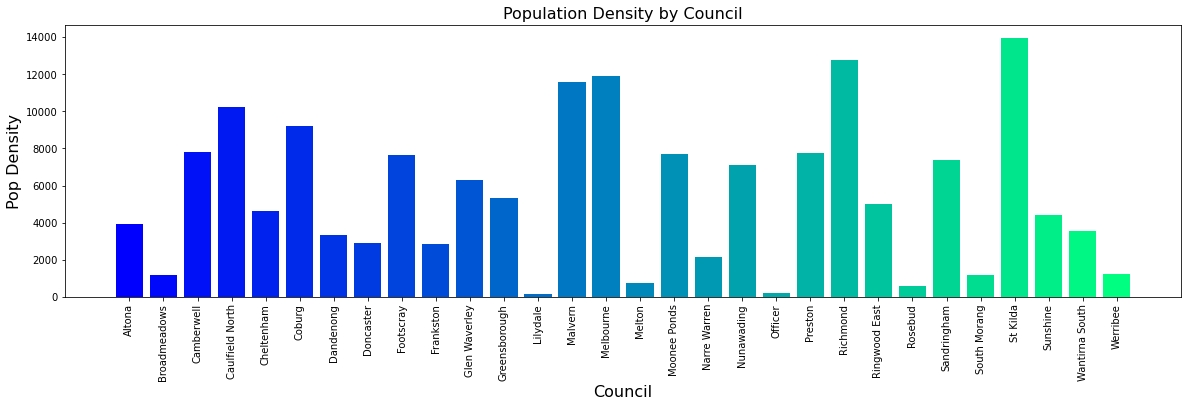

In [19]:
import matplotlib.pyplot as plt

df1 = df.sort_values('Council')
pop = df1['Population']
council = df1['Council']
popden = df1['Pop Density']

colors = cm.winter(np.linspace(0, 1, len(council)))

plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
plt.ylabel("Population", fontsize = 16)
plt.xlabel("Council", fontsize = 16)
plt.title("Population by  Council", fontsize = 16)
plt.bar(council, pop, color = colors)

plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
plt.ylabel("Pop Density", fontsize = 16)
plt.xlabel("Council", fontsize = 16)
plt.title("Population Density by Council", fontsize = 16)
plt.bar(council, popden, color = colors)



In [32]:

map_melb = folium.Map(location=[-37.8142,144.963], zoom_start=9.5)

# add markers to map
for lat, lng, council in zip(df['Latitude'], df['Longitude'], df['Council']):
    label = '{}'.format(council)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melb)  
    
map_melb

<h2>Foursquare API</h2>

In [20]:
CLIENT_ID = 'IUHAUY4S0W1EBB51G1YWPZGRF1ST0KM5HCVYIPVWLNCJQNJ5' # your Foursquare ID
CLIENT_SECRET = 'GQY5G5LWIKR5ADXAUGEL342VM5ZUPMXPS4M2242Q1SCTETDF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [21]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION
)

category_results = requests.get(url).json()

In [36]:
categories = len(category_results['response']['categories'])
catagory_index = []
for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(i,venues)
    catagory_index.append(venues)
    sub_venues=[]
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues.append(category_results['response']['categories'][i]['categories'][j]['name'])
        
    print(sub_venues)
    print('\n')
print(catagory_index)

0 Arts & Entertainment
['Amphitheater', 'Aquarium', 'Arcade', 'Art Gallery', 'Bowling Alley', 'Casino', 'Circus', 'Comedy Club', 'Concert Hall', 'Country Dance Club', 'Disc Golf', 'Escape Room', 'Exhibit', 'General Entertainment', 'Go Kart Track', 'Historic Site', 'Karaoke Box', 'Laser Tag', 'Memorial Site', 'Mini Golf', 'Movie Theater', 'Museum', 'Music Venue', 'Pachinko Parlor', 'Performing Arts Venue', 'Pool Hall', 'Public Art', 'Racecourse', 'Racetrack', 'Roller Rink', 'Salsa Club', 'Samba School', 'Stadium', 'Theme Park', 'Tour Provider', 'VR Cafe', 'Water Park', 'Zoo']


1 College & University
['College Academic Building', 'College Administrative Building', 'College Auditorium', 'College Bookstore', 'College Cafeteria', 'College Classroom', 'College Gym', 'College Lab', 'College Library', 'College Quad', 'College Rec Center', 'College Residence Hall', 'College Stadium', 'College Theater', 'Community College', 'Fraternity House', 'General College & University', 'Law School', 'Medi

<h2> Explore Greater Melbourne</h2>

In [44]:
venues_activities = []
venues_food = []
venues_services = []

req_activities = ['Arts & Entertainment','Event', 'Nightlife Spot', 'Outdoors & Recreation']
req_food = ['Food']
req_services = ['Shop & Service','Travel & Transport']

for i in req_activities:
    key= catagory_index.index(i)
    venues = category_results['response']['categories'][key]['name']
    venues_activities.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        venues_activities.append(sub_venues)

for i in req_food:
    key= catagory_index.index(i)
    venues = category_results['response']['categories'][key]['name']
    venues_food.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        venues_food.append(sub_venues)
        
for i in req_services:
    key= catagory_index.index(i)
    venues = category_results['response']['categories'][key]['name']
    venues_services.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        venues_services.append(sub_venues)
        


In [54]:
def getVenues(councils, latitudes, longitudes, venue_category, radius=2000, LIMIT=100 ):
    venueArray=[]
    for council, lat, lng in zip(councils, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT
        )
            
        jsonOut = requests.get(url).json()["response"]['groups'][0]['items']
        
        venueArray.append([(
            council, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in jsonOut])

    venues = pd.DataFrame([item for venueArray in venueArray for item in venueArray])
    venues.columns = ['Council', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    venues = venues[venues['Venue Category'].isin(venue_category)]
    
    return(venues)

<h3> Activities and things to do around Melbourne</h3>

In [55]:
ActivityVenues = getVenues(councils=df['Council'],latitudes=df['Latitude'],longitudes=df['Longitude'],venue_category=venues_activities)

In [67]:
ActivityVenues.reset_index(drop=True,inplace=True)
ActivityVenues

,Council,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.814218,144.963161,Chuckle Park,-37.815075,144.963908,Bar
1,Melbourne,-37.814218,144.963161,Whitehart,-37.812781,144.961973,Bar
2,Melbourne,-37.814218,144.963161,RMIT Capitol Theatre,-37.814928,144.965397,Movie Theater
3,Melbourne,-37.814218,144.963161,The Wheeler Centre,-37.810241,144.965102,General Entertainment
4,Melbourne,-37.814218,144.963161,Federation Square,-37.818084,144.967962,Plaza
...,...,...,...,...,...,...,...
163,Werribee,-37.907984,144.641675,Riverwalk Village,-37.918152,144.643094,Playground
164,Werribee,-37.907984,144.641675,Werribee Racecourse,-37.902589,144.630589,Racetrack
165,Werribee,-37.907984,144.641675,Wyndham Vale football ground,-37.902094,144.625323,Recreation Center
166,Werribee,-37.907984,144.641675,Harpley Adventure Playground,-37.901840,144.620782,Playground


In [76]:
ActivityVenues['Venue Category'].nunique()

34

In [78]:

map_melb_activity = folium.Map(location=[-37.8142,144.963], zoom_start=9.5)

# add markers to map
for lat, lng, venue,cat in zip(ActivityVenues['Venue Latitude'], ActivityVenues['Venue Longitude'], ActivityVenues['Venue'],ActivityVenues['Venue Category']):
    label = '{},{}'.format(venue,cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melb_activity)  
    
map_melb_activity

<h3> Resturents and Eates around Melbourne</h3>

In [57]:
FoodVenues = getVenues(councils=df['Council'],latitudes=df['Latitude'],longitudes=df['Longitude'],venue_category=venues_food)

In [68]:
FoodVenues.reset_index(drop=True,inplace=True)
FoodVenues

,Council,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.814218,144.963161,Tipo 00,-37.813527,144.961978,Italian Restaurant
1,Melbourne,-37.814218,144.963161,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
2,Melbourne,-37.814218,144.963161,Trattoria Emilia,-37.815220,144.962636,Italian Restaurant
3,Melbourne,-37.814218,144.963161,La Belle Miette,-37.813979,144.961429,Dessert Shop
4,Melbourne,-37.814218,144.963161,Nosh,-37.815396,144.962999,Asian Restaurant
...,...,...,...,...,...,...,...
843,Lilydale,-37.755670,145.347548,Nando's,-37.757124,145.354546,Portuguese Restaurant
844,Lilydale,-37.755670,145.347548,Subway,-37.757530,145.349859,Sandwich Place
845,Lilydale,-37.755670,145.347548,Captain K's Seafood Fish & Chips,-37.756650,145.347410,Fish & Chips Shop
846,Lilydale,-37.755670,145.347548,Blue Turtle Cafe,-37.757925,145.350837,Café


In [80]:
FoodVenues['Venue Category'].unique()

array(['Italian Restaurant', 'Coffee Shop', 'Dessert Shop',
       'Asian Restaurant', 'Donut Shop', 'Tea Room', 'Café',
       'Pizza Place', 'Creperie', 'Bagel Shop', 'Scandinavian Restaurant',
       'BBQ Joint', 'Bubble Tea Shop', 'Juice Bar', 'Bakery',
       'Burger Joint', 'Spanish Restaurant', 'Sandwich Place',
       'Indian Restaurant', 'Mexican Restaurant', 'Australian Restaurant',
       'Seafood Restaurant', 'Vegetarian / Vegan Restaurant',
       'Breakfast Spot', 'Deli / Bodega', 'Diner', 'Gastropub',
       'Fish & Chips Shop', 'Polish Restaurant', 'Turkish Restaurant',
       'Fast Food Restaurant', 'Dumpling Restaurant',
       'Middle Eastern Restaurant', 'Steakhouse', 'Greek Restaurant',
       'Portuguese Restaurant', 'Fried Chicken Joint', 'Restaurant',
       'French Restaurant', 'Food Truck', 'American Restaurant',
       'Salad Place', 'Food Court', 'Mediterranean Restaurant',
       'Eastern European Restaurant', 'Sri Lankan Restaurant',
       'Latin American

In [82]:
FoodVenues.groupby('Council').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Council,,,,,,
Altona,7,7,7,7,7,7
Broadmeadows,12,12,12,12,12,12
Camberwell,47,47,47,47,47,47
Caulfield North,48,48,48,48,48,48
Cheltenham,30,30,30,30,30,30
Coburg,54,54,54,54,54,54
Dandenong,16,16,16,16,16,16
Doncaster,27,27,27,27,27,27
Footscray,43,43,43,43,43,43


<h2>Analyze Melbourne Eats<h2>

In [85]:
# one hot encoding
FoodVenues_onehot = pd.get_dummies(FoodVenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
FoodVenues_onehot['Council'] = FoodVenues['Council'] 

# move neighborhood column to the first column
fixed_columns = [FoodVenues_onehot.columns[-1]] + list(FoodVenues_onehot.columns[:-1])
FoodVenues_onehot = FoodVenues_onehot[fixed_columns]

FoodVenues_onehot.head()

,Council,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,...,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Tea Room,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Melbourne,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
FoodVenues_onehot.shape

(848, 52)

In [88]:
FoodVenues_onehot = FoodVenues_onehot.groupby('Council').mean().reset_index()
FoodVenues_onehot

,Council,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,...,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Tea Room,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Altona,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Broadmeadows,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000
2,Camberwell,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.063830,0.000,0.042553,...,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000
3,Caulfield North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000,0.020833,...,0.000000,0.020833,0.000000,0.000000,0.020833,0.000000,0.020833,0.000000,0.041667,0.000000
4,Cheltenham,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000,0.000000,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
5,Coburg,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000,0.018519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000
6,Dandenong,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Doncaster,0.000000,0.037037,0.000000,0.037037,0.000000,0.000000,0.037037,0.000,0.000000,...,0.037037,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037
8,Footscray,0.000000,0.023256,0.046512,0.023256,0.000000,0.000000,0.069767,0.000,0.000000,...,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Frankston,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
FoodVenues_onehot.shape

(30, 52)

In [90]:
num_top_venues = 5

for hood in FoodVenues_onehot['Council']:
    print("----"+hood+"----")
    temp = FoodVenues_onehot[FoodVenues_onehot['Council'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altona----
                venue  freq
0                Café  0.29
1  Italian Restaurant  0.14
2   Fish & Chips Shop  0.14
3        Burger Joint  0.14
4         Pizza Place  0.14


----Broadmeadows----
                   venue  freq
0   Fast Food Restaurant  0.33
1         Sandwich Place  0.17
2            Pizza Place  0.08
3     Turkish Restaurant  0.08
4  Australian Restaurant  0.08


----Camberwell----
                venue  freq
0                Café  0.53
1  Italian Restaurant  0.06
2              Bakery  0.06
3      Breakfast Spot  0.04
4         Coffee Shop  0.04


----Caulfield North----
                  venue  freq
0                  Café  0.46
1    Italian Restaurant  0.08
2           Pizza Place  0.06
3  Fast Food Restaurant  0.06
4           Coffee Shop  0.04


----Cheltenham----
                  venue  freq
0                  Café  0.30
1  Fast Food Restaurant  0.17
2           Coffee Shop  0.10
3        Sandwich Place  0.07
4     Indian Restaurant  0.03


----Coburg

In [91]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Council']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Food_venues_sorted = pd.DataFrame(columns=columns)
Food_venues_sorted['Council'] = FoodVenues_onehot['Council']

for ind in np.arange(FoodVenues_onehot.shape[0]):
    Food_venues_sorted.iloc[ind, 1:] = return_most_common_venues(FoodVenues_onehot.iloc[ind, :], num_top_venues)

Food_venues_sorted.head()

,Council,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altona,Café,Pizza Place,Burger Joint,Italian Restaurant,Diner,Fish & Chips Shop,Bagel Shop,Bakery,Fast Food Restaurant,Falafel Restaurant
1,Broadmeadows,Fast Food Restaurant,Sandwich Place,Turkish Restaurant,Australian Restaurant,Portuguese Restaurant,Juice Bar,Pizza Place,Café,Creperie,Falafel Restaurant
2,Camberwell,Café,Italian Restaurant,Bakery,Coffee Shop,Breakfast Spot,Portuguese Restaurant,Juice Bar,Burger Joint,Pizza Place,Deli / Bodega
3,Caulfield North,Café,Italian Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Burger Joint,Greek Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Breakfast Spot
4,Cheltenham,Café,Fast Food Restaurant,Coffee Shop,Sandwich Place,Portuguese Restaurant,Fish & Chips Shop,Gastropub,Indian Restaurant,Juice Bar,Burger Joint


<h3>Cluster Neighborhoods<h3>

In [95]:
# set number of clusters
kclusters = 5

grouped_clustering = FoodVenues_onehot.drop('Council', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 2, 2, 4, 4, 0, 1, 2, 4], dtype=int32)

In [96]:
# add clustering labels
Food_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Food_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Food_merged = df.join(Food_venues_sorted.set_index('Council'), on='Council')

Food_merged.head() # check the last columns!

,Local government,Council,Region,Area,Population,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of Melbourne,Melbourne,Inner Melbourne,37,169961,11897,-37.8142,144.963,1,Coffee Shop,Asian Restaurant,Italian Restaurant,Café,Dessert Shop,Pizza Place,Bakery,Indian Restaurant,Juice Bar,Burger Joint
1,City of Port Phillip,St Kilda,Inner Melbourne,21,113200,13961,-37.8638,144.982,1,Café,Pizza Place,Vegetarian / Vegan Restaurant,Breakfast Spot,Australian Restaurant,Italian Restaurant,Burger Joint,Coffee Shop,Mexican Restaurant,Deli / Bodega
2,City of Stonnington,Malvern,Inner Melbourne,26,116207,11576,-37.8584,145.035,2,Café,Italian Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Fish & Chips Shop,Sandwich Place,Portuguese Restaurant,Indian Restaurant,Burger Joint
3,City of Yarra,Richmond,Inner Melbourne,20,98521,12758,-37.8204,145.003,2,Café,Vegetarian / Vegan Restaurant,Breakfast Spot,Pizza Place,Bakery,Burger Joint,Gastropub,Greek Restaurant,Australian Restaurant,BBQ Joint
4,City of Banyule,Greensborough,Metropolitan Melbourne,63,130237,5354,-37.704,145.108,4,Café,Fast Food Restaurant,Juice Bar,Burger Joint,Vegetarian / Vegan Restaurant,Creperie,Fish & Chips Shop,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant


In [103]:
# Visualize Clusters
# create map
map_clusters = folium.Map(location=[-37.8142,144.963], zoom_start=9.5)
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Food_merged['Latitude'], Food_merged['Longitude'], Food_merged['Council'], Food_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3> Cluster Analysis <h3>

In [104]:
Food_merged.loc[Food_merged['Cluster Labels'] == 0, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Sunshine,4395,-37.7881,144.833,0,Fast Food Restaurant,Café,Bakery,Afghan Restaurant,Restaurant,Sandwich Place,Pizza Place,Bagel Shop,BBQ Joint,American Restaurant
19,Narre Warren,2156,-38.0277,145.304,0,Fast Food Restaurant,Café,Sandwich Place,Pizza Place,Portuguese Restaurant,Mexican Restaurant,Australian Restaurant,Kebab Restaurant,Food Court,Donut Shop
21,Dandenong,3309,-37.9875,145.215,0,Fast Food Restaurant,Café,Afghan Restaurant,Bakery,Indian Restaurant,Portuguese Restaurant,Juice Bar,Kebab Restaurant,Asian Restaurant,Deli / Bodega
22,Broadmeadows,1153,-37.6829,144.92,0,Fast Food Restaurant,Sandwich Place,Turkish Restaurant,Australian Restaurant,Portuguese Restaurant,Juice Bar,Pizza Place,Café,Creperie,Falafel Restaurant
23,Wantirna South,3552,-37.8738,145.222,0,Fast Food Restaurant,Café,Pizza Place,Sandwich Place,Food Court,Fried Chicken Joint,Dessert Shop,Creperie,Juice Bar,Coffee Shop
25,Melton,769,-37.6836,144.583,0,Fast Food Restaurant,Pizza Place,Sandwich Place,Australian Restaurant,Bakery,Coffee Shop,Diner,Restaurant,Portuguese Restaurant,Italian Restaurant
26,Rosebud,593,-38.371,144.91,0,Pizza Place,Fast Food Restaurant,Greek Restaurant,Bakery,Sandwich Place,Bistro,Donut Shop,Burger Joint,Creperie,Falafel Restaurant
28,South Morang,1180,-37.6492,145.067,0,Fast Food Restaurant,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Fish & Chips Shop,Pizza Place,Portuguese Restaurant,Juice Bar,Bakery


In [105]:
Food_merged.loc[Food_merged['Cluster Labels'] == 1, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Melbourne,11897,-37.8142,144.963,1,Coffee Shop,Asian Restaurant,Italian Restaurant,Café,Dessert Shop,Pizza Place,Bakery,Indian Restaurant,Juice Bar,Burger Joint
1,St Kilda,13961,-37.8638,144.982,1,Café,Pizza Place,Vegetarian / Vegan Restaurant,Breakfast Spot,Australian Restaurant,Italian Restaurant,Burger Joint,Coffee Shop,Mexican Restaurant,Deli / Bodega
9,Altona,3904,-37.8672,144.829,1,Café,Pizza Place,Burger Joint,Italian Restaurant,Diner,Fish & Chips Shop,Bagel Shop,Bakery,Fast Food Restaurant,Falafel Restaurant
11,Doncaster,2877,-37.7829,145.122,1,Café,Coffee Shop,Dessert Shop,Food Court,Burger Joint,Juice Bar,Bubble Tea Shop,Mediterranean Restaurant,Bakery,Pizza Place
13,Glen Waverley,6319,-37.8797,145.163,1,Sri Lankan Restaurant,Italian Restaurant,Café,Bubble Tea Shop,Burger Joint,Kebab Restaurant,Latin American Restaurant,Coffee Shop,Breakfast Spot,Dessert Shop


In [106]:
Food_merged.loc[Food_merged['Cluster Labels'] == 2, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Malvern,11576,-37.8584,145.035,2,Café,Italian Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Fish & Chips Shop,Sandwich Place,Portuguese Restaurant,Indian Restaurant,Burger Joint
3,Richmond,12758,-37.8204,145.003,2,Café,Vegetarian / Vegan Restaurant,Breakfast Spot,Pizza Place,Bakery,Burger Joint,Gastropub,Greek Restaurant,Australian Restaurant,BBQ Joint
5,Sandringham,7400,-37.9503,145.004,2,Café,Pizza Place,Sandwich Place,Fried Chicken Joint,Coffee Shop,Fish & Chips Shop,French Restaurant,Fast Food Restaurant,Spanish Restaurant,Deli / Bodega
6,Camberwell,7826,-37.8385,145.074,2,Café,Italian Restaurant,Bakery,Coffee Shop,Breakfast Spot,Portuguese Restaurant,Juice Bar,Burger Joint,Pizza Place,Deli / Bodega
8,Caulfield North,10218,-37.8708,145.022,2,Café,Italian Restaurant,Fast Food Restaurant,Pizza Place,Coffee Shop,Burger Joint,Greek Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Breakfast Spot
12,Footscray,7635,-37.8015,144.903,2,Café,Burger Joint,Bakery,Coffee Shop,Food Truck,Asian Restaurant,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant,Eastern European Restaurant
14,Moonee Ponds,7703,-37.7659,144.919,2,Café,Italian Restaurant,Breakfast Spot,Bakery,Burger Joint,Greek Restaurant,Pizza Place,Sandwich Place,Indian Restaurant,Middle Eastern Restaurant


In [107]:
Food_merged.loc[Food_merged['Cluster Labels'] == 3, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Officer,216,-38.0663,145.412,3,Café,Coffee Shop,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Diner,Dessert Shop


In [108]:
Food_merged.loc[Food_merged['Cluster Labels'] == 4, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Greensborough,5354,-37.704,145.108,4,Café,Fast Food Restaurant,Juice Bar,Burger Joint,Vegetarian / Vegan Restaurant,Creperie,Fish & Chips Shop,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant
7,Preston,7751,-37.7419,145.008,4,Café,Fast Food Restaurant,Coffee Shop,Sandwich Place,Burger Joint,Italian Restaurant,Bakery,Pizza Place,Middle Eastern Restaurant,Food Truck
10,Cheltenham,4651,-37.967,145.055,4,Café,Fast Food Restaurant,Coffee Shop,Sandwich Place,Portuguese Restaurant,Fish & Chips Shop,Gastropub,Indian Restaurant,Juice Bar,Burger Joint
15,Coburg,9229,-37.745,144.964,4,Café,Pizza Place,Fast Food Restaurant,Bakery,Middle Eastern Restaurant,Coffee Shop,Portuguese Restaurant,Fish & Chips Shop,Turkish Restaurant,Indian Restaurant
16,Nunawading,7130,-37.8205,145.175,4,Café,Fast Food Restaurant,Pizza Place,Sandwich Place,Food Truck,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Asian Restaurant
20,Frankston,2826,-38.1445,145.127,4,Café,Burger Joint,Restaurant,Italian Restaurant,Fast Food Restaurant,Juice Bar,Fish & Chips Shop,Dumpling Restaurant,Portuguese Restaurant,Pizza Place
24,Ringwood East,4989,-37.8119,145.25,4,Fast Food Restaurant,Café,Coffee Shop,Greek Restaurant,Gastropub,Mexican Restaurant,Portuguese Restaurant,Burger Joint,Restaurant,Sandwich Place
27,Greensborough,389,-37.704,145.108,4,Café,Fast Food Restaurant,Juice Bar,Burger Joint,Vegetarian / Vegan Restaurant,Creperie,Fish & Chips Shop,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant
29,Werribee,1220,-37.908,144.642,4,Café,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Portuguese Restaurant,Coffee Shop,Burger Joint,Pizza Place,Middle Eastern Restaurant,Sandwich Place
30,Lilydale,166,-37.7557,145.348,4,Café,Fish & Chips Shop,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Portuguese Restaurant,Coffee Shop,Falafel Restaurant,Eastern European Restaurant,Dumpling Restaurant


In [109]:
Food_merged.loc[Food_merged['Cluster Labels'] == 5, Food_merged.columns[[1] + list(range(5, Food_merged.shape[1]))]]

,Council,Pop Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
